## Import libraries

In [80]:
# current draft of data
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtaining the Data

My dataset is from the 150 top rated games on Steam over the past 10 years (2012-2022).
So 1500 games total.
In order to obtain my data I scanned 10 Steam250 websites using different urls, then web scraped to find the css selectors for my 6 variables.
I then appended each datapoint to a list and made a dataframe of it.



In [3]:
link = "https://steam250.com/20"

title = []
price = []
score = []
num_votes = []
genre = []
year = []

def func(element):
  return element.string

for i in range(13, 23):
    url = link + str(i)
    page = requests.get(url)
    # print(page.status_code)
    soup = bs(page.content, "html.parser")

    title_i = list(map(func, soup.select("div.appline > span.title > a"))) # v.col1.main.ranking div#\31 div.appline span.title a
    price_i = list(map(func, soup.select("div.appline > span.price, a.free")))
    score_i = list(map(func, soup.select("div:nth-child(3) > span.score")))
    num_votes_i = list(map(func, soup.select("div:nth-child(3) > span.votes")))
    genre_i = list(map(func, soup.select("div.appline > a.genre")))

    for j in range(0, 150):
        title.append(title_i[j])
        price.append(price_i[j])
        score.append(score_i[j])
        num_votes.append(num_votes_i[j])
        genre.append(genre_i[j])
        year.append("20" + str(i))

In [4]:
data = {
    "Year of Release" : year, 
    "Game Title" : title,
    "Game Price" : price,
    "Score" : score,
    "Votes" : num_votes,
    "Genre" : genre,
}

df = pd.DataFrame(data=data)

In [5]:
df.head(10)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,$2.99,8.61,"221,421 votes",Adventure
1,2013,Don't Starve,$2.49,8.60,"101,301 votes",Survival
2,2013,"Papers, Please",$9.99,8.58,"59,499 votes",Political
3,2013,The Wolf Among Us,$14.99,8.58,"30,215 votes",Adventure
4,2013,Outlast,$19.99,8.57,"100,327 votes",Horror
5,2013,Age of Empires II (2013),$19.99,8.51,"97,127 votes",Strategy
6,2013,Gunpoint,$9.99,8.48,"12,343 votes",Stealth
7,2013,The Walking Dead: Season Two,$14.99,8.45,"27,239 votes",Zombies
8,2013,Game Dev Tycoon,$9.99,8.43,"40,140 votes",Management
9,2013,Project Zomboid,$19.99,8.39,"194,306 votes",Survival


## Cleaning the Data

Cleaning the data was quite simple. There were luckily no missing data points. A lot of my data needed to be cleaned to remove special characters such that I could use the numbers as integers and not strings. I also changed free games with 0 dollars to make all prices integers. Looking at the genres, I retitled some to not cause controversy. 


In [6]:
df.shape

(1500, 6)

In [7]:
df.dtypes

Year of Release    object
Game Title         object
Game Price         object
Score              object
Votes              object
Genre              object
dtype: object

In [8]:
# thank goodness
df.isnull().sum()

Year of Release    0
Game Title         0
Game Price         0
Score              0
Votes              0
Genre              0
dtype: int64

In [9]:
df[["Votes", "year"]] = df["Votes"].str.split(' ', expand=True)

In [10]:
#df.head(2)

In [11]:
df.drop(['year'], axis=1, inplace=True)

In [12]:
df.head(2)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,$2.99,8.61,"221,421",Adventure
1,2013,Don't Starve,$2.49,8.60,"101,301",Survival


In [13]:
df["Votes"] = df["Votes"].str.replace(',', '')
df["Game Price"] = df["Game Price"].str.replace('$', '')

C:\Users\mitch\AppData\Local\Temp\ipykernel_308\1601834454.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Game Price"] = df["Game Price"].str.replace('$', '')


In [14]:
# not sure what that warning above means but it works

df.head(2)

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,2.99,8.61,221421,Adventure
1,2013,Don't Starve,2.49,8.60,101301,Survival


In [15]:
# df.dtypes


In [16]:
df["Score"] = df["Score"].astype('float64')
df["Votes"] = df["Votes"].astype('int64')

In [17]:
# df["Game Price"] = df["Game Price"].astype('float64')
for i in range(1500):
    if df["Game Price"][i] == "free":
        df["Game Price"][i] = "0.00"
    elif df["Game Price"][i] == "Free":
        df["Game Price"][i] = "0.00"

C:\Users\mitch\AppData\Local\Temp\ipykernel_308\2853826804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Game Price"][i] = "0.00"


In [18]:
df["Game Price"] = df["Game Price"].astype('float64')

In [19]:
df["Game Title"] = df["Game Title"].astype('string')
df["Genre"] = df["Genre"].astype('string')
df["Year of Release"] = df["Year of Release"].astype('int64')

In [20]:
df.dtypes

Year of Release      int64
Game Title          string
Game Price         float64
Score              float64
Votes                int64
Genre               string
dtype: object

In [21]:
df.head()

,Year of Release,Game Title,Game Price,Score,Votes,Genre
0,2013,Tomb Raider,2.99,8.61,221421,Adventure
1,2013,Don't Starve,2.49,8.60,101301,Survival
2,2013,"Papers, Please",9.99,8.58,59499,Political
3,2013,The Wolf Among Us,14.99,8.58,30215,Adventure
4,2013,Outlast,19.99,8.57,100327,Horror


In [22]:
# there are way too many different genres to analyze
# must condense
df.nunique()

Year of Release      10
Game Title         1500
Game Price           90
Score               126
Votes              1421
Genre               205
dtype: int64

In [23]:
# find most repeated genres
item_counts = df["Genre"].value_counts()

print(type(item_counts), '\n')
print(item_counts[:20])


<class 'pandas.core.series.Series'> 

Adventure               111
Action                   94
Casual                   76
Puzzle                   76
Visual Novel             75
RPG                      60
Horror                   53
Strategy                 39
Simulation               39
Sexual Content           34
Anime                    29
FPS                      28
Story Rich               26
Action Roguelike         23
Platformer               20
Bullet Hell              18
Psychological Horror     18
Pixel Graphics           18
Fighting                 17
Funny                    17
Name: Genre, dtype: Int64


In [24]:
# my pick for top 10 is:
    # action/adventure, puzzle, rpg, casual, artistic, platformer, horror, strategy, simulation, fps
    # however, due to time constrants, I'm going to leave them as is and hope nothing bad happens
    # I will only change the potentially iffy ones

for i in range(1500):
    if (df["Genre"][i] in {"Sexual Content"}):
        df["Genre"][i] = "Dating Sim"
    if (df["Genre"][i] in {"Hentai"}):
        df["Genre"][i] = "Anime"
    if (df["Genre"][i] in {"LGBTQ+"}):
        df["Genre"][i] = "Story Rich"   

In [25]:
df.to_csv("games_dataset_cleaned.csv")

## Data Visualizations

Each visualization has its own interpretation below it

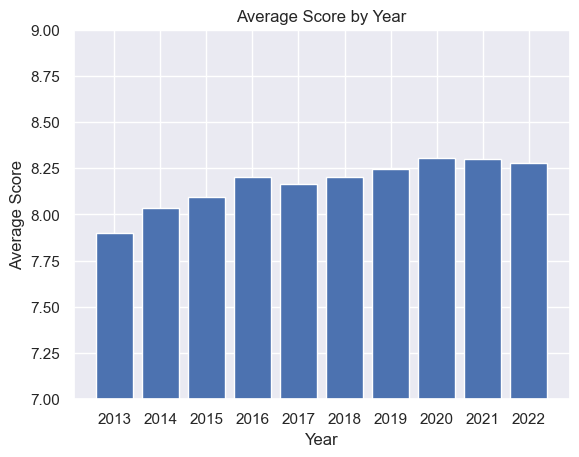

In [81]:
# Group data by year and calculate average votes
grouped_data = df.groupby('Year of Release')['Score'].mean()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Set chart title and axis labels
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')

plt.xticks(grouped_data.index)
plt.ylim(7, 9)

# Show the chart
plt.show()



Average Score By Year: shows that the score increases with year date. 2016 was an exceptionally good year for games as there is a sharper increase, followed by 2017 and 2018’s drop. I predict the increase in scores are due to technological advances allowing games to be more realistic and therefore more people liking them.

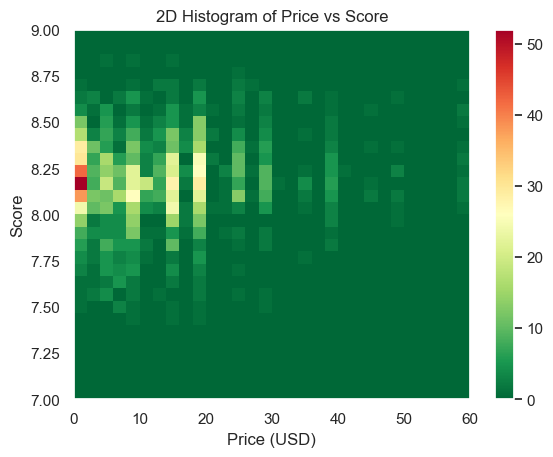

In [93]:
# Create a scatter plot with a linear regression line
plt.hist2d(df["Game Price"], df["Score"], bins=30, cmap="RdYlGn_r", range=[[0, 60], [7, 9]])

# Set chart title and axis labels
plt.title('2D Histogram of Price vs Score')
plt.xlabel('Price (USD)')
plt.ylabel('Score')

plt.colorbar()

# Show the chart
plt.show()

Price vs Score: There are 30 bins because it best shows the variability in data. According to the graph, a large number of free games are scored around 8.13. There are more games with prices 0-30 dollars than 30-60. There are lines in the price because price isn’t a fluid number and usually shows up in every 5 dollar increments. Across the board, there doesn’t seem to be much correlation between price and score as most scores are present across all price ranges. However, one might say there’s a flat correlation between the two, that most scores fall in the 8.25 range for every price.


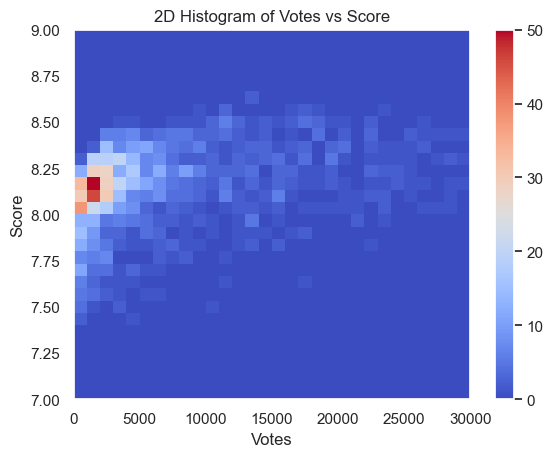

In [28]:
# Create a scatter plot with a linear regression line
plt.hist2d(df["Votes"], df["Score"], bins=30, cmap="coolwarm", range=[[0, 30000], [7, 9]])

# Set chart title and axis labels
plt.title('2D Histogram of Votes vs Score')
plt.xlabel('Votes')
plt.ylabel('Score')


plt.colorbar()

# Show the chart
plt.show()

Votes vs Score: This one is similar to price vs score. There’s a slightly positive correlation since most games with lower votes are between 8-8.25 while higher votes are around 8.50. This makes sense as higher votes correlate to a higher population of people playing it, and this confirms that a higher population means a better game. Also, most games have less than 5000 votes, as seen by the red and white sections.


## Machine Learning 

The machine learning was the toughest part. My goal was to predict the score of the game based on price, genre, and votes. However, since the genre was categorical, it was too tough for me to implement. Anyways, I continued the model with price and votes predicting score.

To create the model, I created training and testing data with an 80 20 split, then fit the data to a linear regression model. I used this regression model because even with the seemingly low correlation in my heatmaps, linear seemed to best capture the trend. I then used mean squared error to test for accuracy because it’s one of the best measures for linear regression. I ran the model recreation in a loop so that it can create the best model with the lowest MSE. I then tracked and located the intercept and coefficients that make the line and printed them on the bottom. I also created a 3D visualization of all the points where (x, y, z) is (Game Price, Score, Votes). Using the line from the best model, I predicted some game scores using the heatmaps as a guide to show the predictions matched the data visualizations well.


MSE: 0.040016101525876625, model is line with intercept 8.144802312101591 and coeffs [1.42969274e-03 3.13391463e-07]


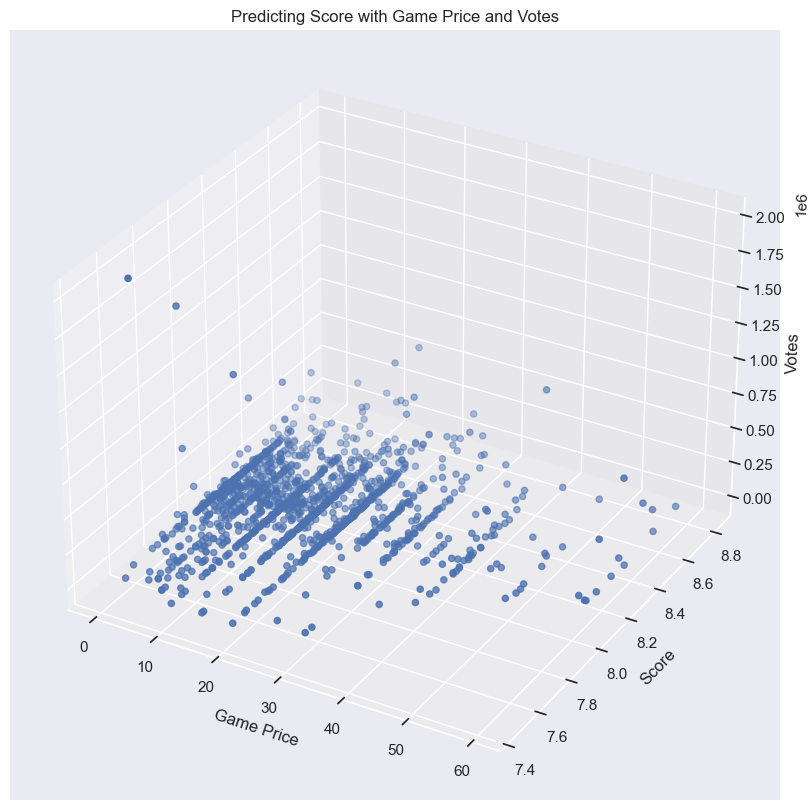

In [79]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# make 3d graph
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# x, y, z
x = df["Game Price"]
y = df["Score"]
z = df["Votes"]

# make scatterplot of all
ax.scatter(x, y, z)
ax.set_xlabel('Game Price')
ax.set_ylabel('Score')
ax.set_zlabel('Votes')
ax.set_title('Predicting Score with Game Price and Votes')

# 1: split data into input features and target variable
x = df[["Game Price", "Votes"]]
y = df["Score"]

ic_data = []
for_mse = []

# create n models, train them, and find the model with the lowest MSE
# that is the best model
n = 100
for i in range(n):
    # 2: make training and testing dataset
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    df_train = pd.concat([x_train, y_train], axis=1)
    df_test = pd.concat([x_test, y_test], axis=1)


    # 3: Train the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    ic_data.append((model.intercept_, model.coef_))
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    for_mse.append(mse)

mse_min = np.min(np.abs(np.array(for_mse)))
mse_idx = np.where(np.array(for_mse) == mse_min)[0][0]

intercept = ic_data[mse_idx][0]
coeffs = ic_data[mse_idx][1]

print(f"MSE: {mse_min}, model is line with intercept {intercept} and coeffs {coeffs}")
plt.show()

In [97]:
def predict_score(price, votes):
    return coeffs[0] * price + coeffs[1] * votes + intercept

# 10 dollars avg about 8.15, 10000 votes avg about 8.2
print(predict_score(10, 10000))
# 8.25 avg, 8.3 avg
print(predict_score(0, 25000))

8.16223315411756
8.152637098687238


In conclusion, the model did a decent job at predicting game score from price and votes. The price has a stronger impact on game score as the slope of the line is higher. Although it’s unclear what a good MSE is, it must be as close to 0 as possible and 0.04 is very close to 0 relatively. With more time I would’ve created more regression models and included other variables like genre. 
